# Die Berliner Luftbrücke


Nach dem Ende des Zweiten Weltkriegs wurde Deutschland in vier Besatzungszonen aufgeteilt: Amerikanisch, Britisch, Französisch und Sowjetisch. Berlin wurde ebenfalls in vier Zonen aufgeteilt, aber der Zugang zu ihm erfolgte ausschließlich über das Gebiet der sowjetischen Besatzungszone.

![Besatzungszonen in Deutschland nach dem 2-ten Weltkrieg. Quelle: Wikipedia.](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Deutschland_Besatzungszonen_8_Jun_1947_-_22_Apr_1949.svg/800px-Deutschland_Besatzungszonen_8_Jun_1947_-_22_Apr_1949.svg.png)

Am 24-ten Juni 1948 blockierte die Sowjetunion den Zugang zu West-Berlin, was zu einer der bedeutendsten Konfrontationen des Kalten Krieges führte. Ohne Zugang über Land oder Wasser begannen die westlichen Alliierten, die Stadt von der Luft aus zu versorgen ([Berliner Luftbrücke](https://en.wikipedia.org/wiki/Berlin_Blockade)).

![Landung einer C-54 am Flughafen Tempelhof. Quelle: Wikipedia.](https://upload.wikimedia.org/wikipedia/commons/d/d8/C-54landingattemplehof.jpg)

## Problembeschreibung

Der Einfachheit halber nehmen wir an, dass die Lieferungen nach Berlin mit zwei Arten von Flugzeugen erfolgen: amerikanischen, die bis zu 30.000 Kubikfuß Fracht ($\approx 849 m^3$) aufnehmen können, und britischen Flugzeugen mit einer Kapazität von bis zu 20.000 Kubikfuß ($\approx 566 m^3$).

- Aufgrund von Einschränkungen in der Infrastruktur können an einem Tag maximal 48 Flugzeuge (unabhängig von der Art) fliegen.
- Für jeden Flug eines amerikanischen Flugzeugs sind 16 Personen erforderlich, doppelt so viele wie für britische Flugzeuge. Insgesamt stehen 512 Personen pro Tag zur Verfügung.
- Die Kosten für Treibstoff und Wartung der Flugzeuge betragen 9000 Dollar pro Flug für amerikanische Flugzeuge und 5000 Dollar pro Flug für britische Flugzeuge. Aufgrund von Budgetbeschränkungen dürfen die Gesamtkosten 300.000 Dollar nicht überschreiten.

Wie viele Flugzeuge jeder Art sollten eingesetzt werden, um das Frachtvolumen zu maximieren?

## Das mathematische Modell

:::{.callout-note collapse="true"}
## Zielvariablen

$$
\begin{align*}
& x_A: \text{ Anzahl amerikanischer Luftzeuge}\\
& x_B: \text{ Anzahl britischer Luftzeuge}
\end{align*}
$$
:::

:::{.callout-note collapse="true"}
## Zielfunktion

Das Frachtvolumen ist die Summe der Frachtvolumina der beiden Flugzeugtypen:

$$
z(x_A, x_B) = 3 x_A + 2 x_B
$$

:::

:::{.callout-note collapse="true"}
## Einschränkungen

$$
\begin{align*}
& x_A + x_B \leq 48 & \text{ (Infrastruktur)} \\
& 16 x_A + 8 x_B \leq 512 & \text{ (Personal)} \\
& 9 x_A + 5 x_B \leq 300 & \text{ (Kosten)} \\
& x_A  \geq 0 &  \\
& x_B \geq 0 &
\end{align*}
$$
:::

:::{.callout-note collapse="true"}
## Das ganze Modell

$$
\begin{align*}
& \max z(x_A, x_B) = 3 x_A + 2 x_B \\
& \text{under den Bedingungen:} \\
& x_A + x_B \leq 48 \\
& 16 x_A + 8 x_B \leq 512 \\
& 9 x_A + 5 x_B \leq 300 \\
& x_A  \geq 0 \\
& x_B \geq 0
\end{align*}
$$
:::


Bevor wir die Lösung des Problems diskutieren, lassen Sie uns die Aufgabe nur unter der ersten Beschränkung (Infrastruktur) betrachten.


$$
\begin{align*}
\max 3 x_A + 2 x_B \\
x_A + x_B \leq 48 \\
x_A \geq 0 \\
x_B \geq 0
\end{align*}
$$

Lösung: 

$$
(x_A^* = 48, x_B^* = 0)
$$

## Die zulässige Menge (Feasible Set)

Zuerst werden wir die zulässige Menge graphisch darstellen, indem wir die Geraden zu jeder der fünf Beschränkungen (einschließlich der Nichtnegativitätsbeschränkungen) zeichnen. Um die Geraden zeichnen zu können, benötigen wir jeweils zwei Punkte. Die einfachste Möglichkeit, die Schnittpunkte mit den beiden Achsen ($x_A$ und $x_B$) zu finden.

Die Gerade zur ersten Beschränkung (Infrastruktur) ist:

$$
x_A + x_B = 48
$$


Schnittpunkte mit den beiden Achsen:

- Für $x_A = 0$ ist $x_B = 48$
- Für $x_B = 0$ ist $x_A + 0 = 48$

Die Gerade zur zweiten Beschränkung (Personal) ist:

$$
16 x_A + 8 x_B = 512
$$

Die Schnittpunkte mit den beiden Achsen:

- Für $x_A = 0$: $16 \cdot 0 + 8x_B = 512 \implies x_B = 512 / 8 = 64$
- Für $x_B = 0$: $16 x_A +8 \cdot 0 = 512 \implies x_A = 512 / 16 = 32$


Auf die gleiche Weise können wir die Schnittpunkte für die dritte Beschränkung (Kosten) finden:
(0, 300 / 5) и (300 / 9, 0).

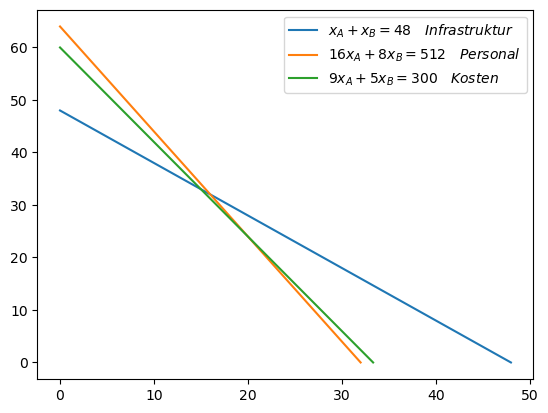

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot([0, 48], [48, 0], label=r'$x_A + x_B = 48 \quad Infrastruktur$')
ax.plot([0, 32], [64, 0], label=r'$16 x_A + 8 x_B = 512\quad Personal$')
ax.plot([0, 33.33], [60, 0], label=r'$9 x_A + 5 x_B = 300 \quad Kosten$')

ax.legend(loc=0)

In [2]:
import polytope as pc
import numpy as np

A = np.array([[1, 1], [16, 8], [9, 5], [-1, 0], [0, -1]])
b = np.array([48, 512, 300, 0, 0])

P = pc.Polytope(A, b)
extreme_points = pc.extreme(P)

extreme_points

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


array([[32., -0.],
       [20., 24.],
       [15., 33.],
       [-0., 48.],
       [-0., -0.]])

Die zulässige Menge ist durch die Eckpunkte (0, 0), (32, 0), (20, 24), (15, 33), (0, 48) beschrieben.

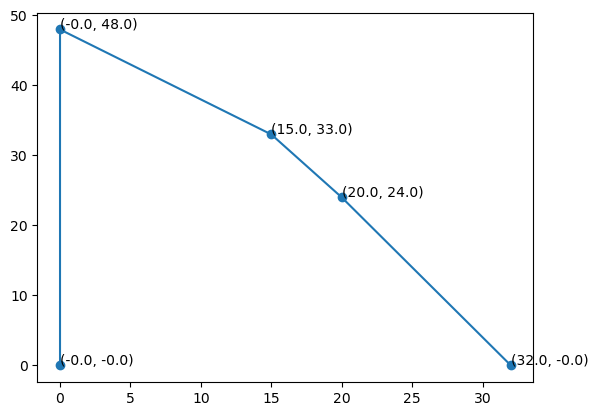

In [3]:
from matplotlib import pyplot as plt

plt.plot(extreme_points[:, 0], extreme_points[:, 1], '-o')

for i, p in enumerate(extreme_points):
    plt.text(p[0], p[1], f"({p[0]:0.1f}, {p[1]:0.1f})")


In [9]:
def z(x_A, x_B):
    return 3 * x_A + 2 * x_B

# (0, 0)
print("z(0, 0) = ", z(0, 0))

# (32, 0)
print("z(32, 0) = ", z(32, 0))

# (20, 24)
print("z(20, 24) = ", z(20, 24))

# (15, 33)
print("z(15, 33) = ", z(15, 33))

# (0, 48)
print("z(0, 48) = ", z(0, 48))

z(0, 0) =  0
z(32, 0) =  96
z(20, 24) =  108
z(15, 33) =  111
z(0, 48) =  96


Die optimale Kombination von amerikanischen und britischen Flugzeugen ist $(x_A^* = 15, x_B^* = 33)$. Dies ist die größtmögliche Ladung, die die Flugzeuge unter den gegebenen Beschränkungen transportieren können. Diese Ladung beträgt $30000 \cdot 15 + 20000 \cdot 33 = 1 110 000$ Kubikfuß, die mit 15 amerikanischen und 33 britischen Flugzeugen transportiert werden.

## Das Problem mit diesem Ansatz

Nun haben wir die Optimierungsaufgabe gelöst, indem wir die Eckpunkte der zulässigen Menge berechnet und die Zielfunktion in jedem von ihnen berechnet haben. Die Lösung der Maximierungsproblems war der Punkt mit dem höchsten Wert der Zielfunktion.

Leider ist dieser Ansatz für praktische Zwecke unbrauchbar, denn die Anzahl der Eckpunkte der zulässigen Menge wächst mit der Anzahl der Beschränkungen und Variablen. Eine obere Schranke für die Anzahl der Eckpunkte der zulässigen Menge ist durch den binomischen Koeffizienten gegeben:

 $$
 \binom{n}{k} = \frac{n!}{k!(n-k)!}
 $$

 dabei ist $n$ die Anzahl der Variablen und $k$ die Anzahl der Beschränkungen. Wir können die obere Schranke für die Anzahl der Eckpunkte der zulässigen Menge für verschiedene Kombinationen von $n$ und $k$ berechnen:

In [5]:
from scipy.special import comb

print("n = 20, k = 15, Maximale Anzahl von Eckpunkten = ", comb(20, 15))
print("n = 40, k = 25, Maximale Anzahl von Eckpunkten = ", comb(40, 25))
print("n = 50, k = 25, Maximale Anzahl von Eckpunkten = ", comb(50, 25))

n = 20, k = 15, Maximale Anzahl von Eckpunkten =  15504.0
n = 40, k = 25, Maximale Anzahl von Eckpunkten =  40225345056.0
n = 50, k = 25, Maximale Anzahl von Eckpunkten =  126410606437752.05


Selbst mit einem relativ kleinen Problem, das 80 Variablen und 40 Beschränkungen hat, ist die Anzahl der Eckpunkte der zulässigen Menge astronomisch. Nehmen wir an, daß ein Rechnerkern 1 Milliarde Eckpunkte pro Sekunde berechnen kann. Dann würde es ungefähr 1.8 Millionen Jahre dauern, um alle Operationen durchzuführen.

In [6]:
comb_n = comb(80, 45)
print(round(comb_n / (1e9 * 60 * 60 * 24 * 365), 1), "Jahre")

1836016.6 Jahre


## Lösung mit Excel

[Hier herunterladen](https://github.com/febse/data/raw/main/opt/Berlin-Air-Example.xlsx)

## Lösung mit gurobi und Python


In [10]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

# New model instance

m = gp.Model("Berlin Airlift")

x_A = m.addVar(vtype=GRB.CONTINUOUS, lb = 0, name="American")
x_B = m.addVar(vtype=GRB.CONTINUOUS, lb = 0, name="British")

# Objective function

m.setObjective(3 * x_A + 2 * x_B, GRB.MAXIMIZE)

# Constraints

m.addConstr(x_A + x_B <= 48, "Infrastructure")
m.addConstr(16 * x_A + 8 * x_B <= 512, "Staff")
m.addConstr(9 * x_A + 5 * x_B <= 300, "Budget")

# Non-negativity constraints are added automatically in addVar

# Solving the model
m.optimize()

# Print the solution
for v in m.getVars():
    print(f"{v.varName}: {v.x}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 20.04.6 LTS")

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 943475 - for non-commercial use only - registered to am___@feb.uni-sofia.bg
Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xbbf91f0b
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 5e+02]
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7500000e+30   4.687500e+30   1.750000e+00      0s
       3    1.1100000e+02   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.110000000e+02
American: 14.999999999999993
British: 33.000000000000014


In [8]:
tmp = {v.varName: [v.x] for v in m.getVars()}
res_df = pd.DataFrame(tmp)
res_df.head()

,American,British
0,15.0,33.0
